# Recording city cameras using connection and image validation

#### Import recorder class

In [1]:
from modules.recorder import recorder
from modules.image_similarity import similarity_classifier
import matplotlib.pyplot as plt
from time import time as t, sleep
from IPython.display import clear_output as co

C:\Users\luisr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


---
### Capture on disconnected camera

Note: Default connection validation. Independent of image validation.

In [3]:
rec = recorder(n_frames=3, retries=10)

frames_filtered = rec.capture('655') # code 655 does not respond

CONNECTION LOST. CODE 655. MAX RETRIES (10) EXCEEDED.


--- 


### Capture without validation on regular camera

Note: First frame may or may not be invalid. Usually the first few frames are invalid (grey or black images).

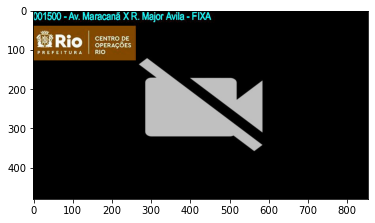

In [4]:
rec = recorder(n_frames=3, skip_method=None, skip_max=None)

frames_filtered = rec.capture('1500')

ax = plt.imshow(frames_filtered[0][1])

### Capture with validation on regular 

Note: Should capture only valid frames.

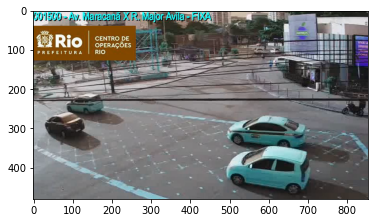

In [5]:
rec = recorder(n_frames=3, skip_method='histogram', skip_max=None)

frames_filtered = rec.capture('1500')

ax = plt.imshow(frames_filtered[0][1])

---
### Capture whitout validation on invalid camera

Note: First frame may or may not be invalid. Usually the first few frames are invalid (grey images).

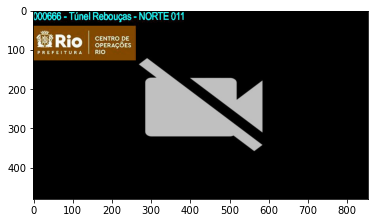

In [6]:
rec = recorder(n_frames=3, skip_method=None, skip_max=None)

frames_filtered = rec.capture('666') # get a few frames - code 666 doesn't work

ax = plt.imshow(frames_filtered[0][1])

### Capture with validation on invalid camera

Note: If 'validate' is not None, set 'max_invalid_frames' for cameras with only invalid images to avoid an infinit loop.

In [7]:
# creates an infinit loop if 'skip_max' is None
rec = recorder(n_frames=3, skip_method='histogram', skip_max=10)

frames_filtered = rec.capture('666') # code 666 only returns invalid images

rec.record('666')

CAPTURE STOPPED. CODE 666. MAX SKIPPED FRAMES (10) EXCEEDED.
CAPTURE STOPPED. CODE 666. MAX SKIPPED FRAMES (10) EXCEEDED.
FAILED TO RECORD. CODE 666, AT 2023-02-19 16-56-51.
